# Quick Machine Learning Run Through with Regresion

## State the problem.

<p>The absolute first rule of Machine Learning and Data Science is to know what it is you are attempting to understand. Have a question or a problem that needs to be addressed. Create a problem statement or a research question. There needs to be an explicit purpose laid out before one embarks on creating a model and exploring data. It may seem obvious that one could not build a Machine Learning model without knowing it's purpose, but starting outthe process with out a clear goal can lead a researcher down a rabbit hole of possibilities and uncertainty. Have a purpose and keep focused on that so that these tools can help reveal an answer, otherwise there are so many threads to follow one can get lost.</p>

<p>Hand in hand with this is to remember that the technology is just a tool to use in a toolbox. However just because we have them does not mean they are necessary. Use the problem statement that you want to solve to determine what means will best deliver a sound answer. Perhaps NLP and Machine Learning is not necessary. In that case it would be a distraction to begin analysing a corpus with the Natural Language Toolkit when it can offer nothing in furtherance of an answer. For this workshop we have taken a backwards approach to expose ourselves to the tools, but in the next exercises we will see how the definition of the problem shapes so much of the Machine Learning process.</p>

## Get the data

Based on our problem statement what data do we need to look for an answer. If we are trying to predict housing prices then weather data is not going to be very helpful. This is an ovesimplification of the problem but it is important to think about what information is needed to solve the problem, and where that data can come from. You may need to aggregate sources to get all of the features you need to address an issue. Going back to our housing price issue, we may want to combine crime statistics with real estatate listings to see how crime rates with square footage impact price. Finding that data and getting our hands on it is a big part of the battle.

## Explore the data
This step is easily where the majority of the work happens. Once we have the data we need to get it into some form we can use. You may already have some idea of the work that goes into digitizing a text, let alone processing it into bits that a computer can make sense of. In the case of web scraping, these texts require an incredible amount of cleaning up in order to get at the heart of the information and then put it into a form the computer can work with. 

Furthermore, with Natural Language Processing, and Textual Analysis, a computer does not understand words per se. The words need to be represented as numbers, and how that transformation is made is not always apparent and also requires a lot of work. A simple example of this is using word frequency to understand what a text is about. The computer works with that frequency number and can do nothing with the word it refers to.

In this phase the data is cleaned up and features are examined for their relevance to the problem. This is where data scientists spend the majority of their time.

## Build the model.
Now that the data is ready it is just a matter of passing the data on to the machine learning algorithm. This might be the easiest step in the process. Once the features are identified and prepared it is only a matter of letting the algorithm work on them. This is the training phase. A model is "trained" on a set of training data, and then the results are evaluated. There is some fine tuning that can be done here, trying different models, adjusting features, but the hard work is over.

## Apply the model or share the results. 
Once we have tested the model and found one that works for the problem we have outlined, all that is left is to apply it to the problem. Sticking with our housing question, we would then give the model some data about houses to see what the price would be. In a business environment we would then share the predictions made by the model with a financial group that might be making decisions based on our data. If we are building a spam filter then we would work with developers to incorporate our detection model into an email server. It is important to remember that the machine learning model is not the solution. Once the model is created, there are many way that the results can be shared, or need to be shared to address the problem that we set out to address. 

<hr style="height:2px"/>
## Regression
<div style="text-align:center">
    <h3>linear</h3>
<img src="images/regression1.png" style="display:inline-block;width:40%;margin-top:2em;margin-right:2em"/><img src="images/regression2.jpg" style="display:inline-block;width:45%;margin-left:2em"/>
    <h3>non-linear</h3>
    <img src="images/nonlinear.png"/>
</div>

A common application of regression is used to predict a target value based on some known criteria that has some correlation. The images above represent how the prediction (y) would correlate to a known vector (x). The images above are used to illustrate the concept of regression. This is linear regression, but with machine learning we can increase the number of vectors that correlate to our target, but this is not easy to visualize as we start thinking about more than three dimension in our regression.

Once again the process is the same as we had for classification. 
1. Choose the model/algorithm
2. Train the model (the learning part)
3. Evaluate the model
4. Apply the model to new data to make predicitons.

One difference with regression is that accuracy (i.e. prediction is correct or incorrect) is not a good measure for the utility of a model. For example, if our model predicts that a house with 4 rooms in a modest neighborhood will cost 22,405 but the actual cost is 21,340 the fact that our model did not get the price correct is not as significant as how close to the actual price our prediction is. In this case if we have a model that predicts a house price to be 22,405 for the 21,340 we might find this amount of error to be acceptable. Where as if we have a model that predicts the price of the same house to be 50,000 we will likely find this error to be signifanct enough to consider our model ineffective.

Therefore when judging the score of a regression model we look at the relative differences in all of the predictions to the actual values. FOr this we us something called R^2 which takes the deviation and normalizes it to a scale of 0 to 1, 1 being perfect and 0 being terrible (essentially guessing) and -1 is always wrong. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as pplot
import sklearn
import seaborn as sns

%matplotlib inline

For this brief exercise we will look at some housing data that comes from this kaggle page [Simple Linear Regression on Kaggle](https://www.kaggle.com/arejet/simple-linear-regression), and create a model that will predict the price of a house based on a select group of features. 

### Import the data

In [3]:
#https://www.kaggle.com/arejet/simple-linear-regression
data = pd.read_csv('data/kc_house_data.csv')

In [4]:
# let's see how much data we have
data.shape

(21613, 21)

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Explore the data

We can see the data is already in integer and float number types, except date. So we it doesn't look like we need to do much feature extraction yet.

In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Do we understand what these all mean (e.g. waterfront, condition, grade)? Is there any documentation? 

Let's do soem quick visualization and see if we can find useful feature.

Remeber Price is our target variable, our label (i.e. our y value).

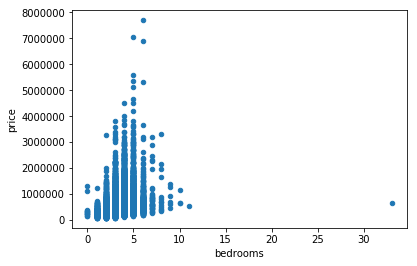

In [9]:
data.plot(kind='scatter', x='bedrooms', y='price' )

This is a useful way to look a the data. Let's make it a function so we can produce scatter plots quickly.

In [10]:
def scatter(col):
    data.plot(kind='scatter', x=col, y='price' )

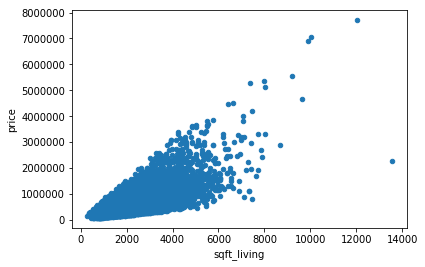

In [11]:
scatter('sqft_living')

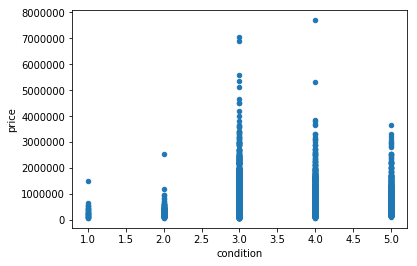

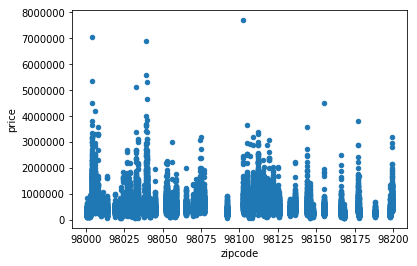

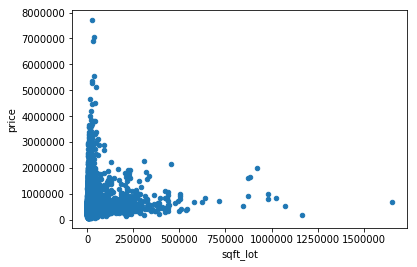

In [12]:
features = ['condition','zipcode','sqft_lot']
for i in features:
    scatter(i)

You can begin to see the limits to scatter plot exploration. For example, there is no linear meaning to zip codes. and if the data is not coninuos it is not very useful either.

In [13]:
zips = data.groupby('zipcode')

In [14]:
zips['price'].mean()

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
98006    8.596848e+05
98007    6.171051e+05
98008    6.455074e+05
98010    4.236660e+05
98011    4.903515e+05
98014    4.556171e+05
98019    4.247887e+05
98022    3.157093e+05
98023    2.867328e+05
98024    5.805268e+05
98027    6.169906e+05
98028    4.624800e+05
98029    6.126536e+05
98030    2.961880e+05
98031    3.005399e+05
98032    2.512962e+05
98033    8.037195e+05
98034    5.216529e+05
98038    3.668676e+05
98039    2.160607e+06
98040    1.194230e+06
98042    3.116321e+05
98045    4.394711e+05
98052    6.452315e+05
98053    6.781631e+05
             ...     
98092    3.349211e+05
98102    9.012583e+05
98103    5.849192e+05
98105    8.628252e+05
98106    3.195814e+05
98107    5.790534e+05
98108    3.556785e+05
98109    8.796236e+05
98112    1.095499e+06
98115    6.199005e+05
98116    6.186342e+05
98117    5.767950e+05
98118    4.176374e+05
98119    8.494480e+05
98

Looks like zip code has some correlation to price.

Let's use seaborn to just get a big over view and select a few features.

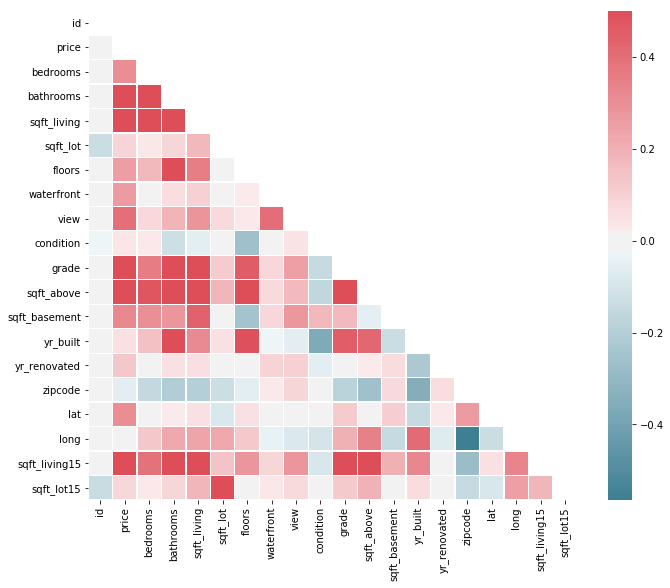

In [15]:
import matplotlib.pyplot as plt
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, vmax=.5, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.2)

We still get some good indications for a couple of features, but zip code doesn't seem to indicate price. Let's try adding in the zipcode's median value and see if that affects anything. zip code as a number does not really represent anything except a category. 

In [16]:
zip_price = pd.DataFrame(zips['price'].mean())
zip_price

,price
zipcode,
98001,2.808047e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.355927e+06
98005,8.101649e+05
98006,8.596848e+05
98007,6.171051e+05
98008,6.455074e+05
98010,4.236660e+05


In [17]:
from sklearn import preprocessing
zip_price['price'] = preprocessing.scale(zip_price.values)

In [18]:
zip_price.loc[98199]

price    0.769798
Name: 98199, dtype: float64

In [19]:
for zip in zip_price.index:
    print (zip)

98001
98002
98003
98004
98005
98006
98007
98008
98010
98011
98014
98019
98022
98023
98024
98027
98028
98029
98030
98031
98032
98033
98034
98038
98039
98040
98042
98045
98052
98053
98055
98056
98058
98059
98065
98070
98072
98074
98075
98077
98092
98102
98103
98105
98106
98107
98108
98109
98112
98115
98116
98117
98118
98119
98122
98125
98126
98133
98136
98144
98146
98148
98155
98166
98168
98177
98178
98188
98198
98199


In [20]:
data['zip_median'] = 0

In [21]:
def assign_zip_med(z):
    for zip in zip_price.index:
        if z == zip:
            return zip_price.loc[z]['price']

In [22]:
assign_zip_med(98199)

0.7697982440767632

In [23]:
data['zip_median'] = data['zipcode'].map(lambda x:assign_zip_med(x))

In [24]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_median
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.833481
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,-0.304251
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,-0.327493
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,-0.030269
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0.415913


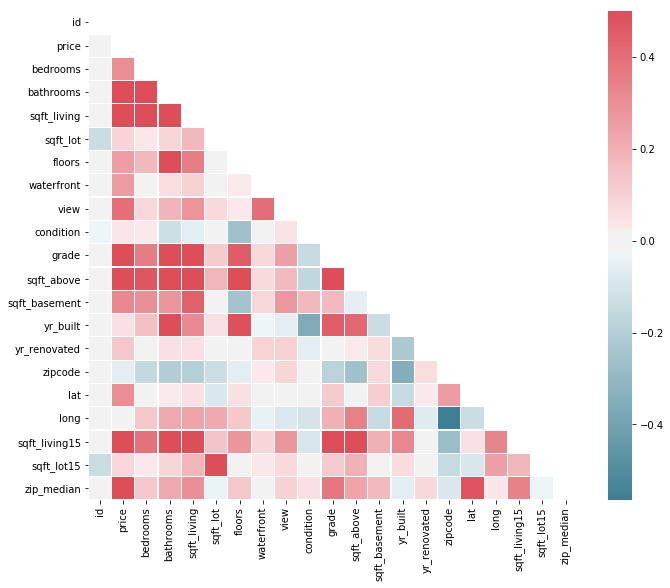

In [25]:
import matplotlib.pyplot as plt
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, vmax=.5, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.2)

That feels like it is more accurate.
So let's pick a handful of features to use in creating our regression model.

I would choose:
* zip_median 
* sqft_living
* grade
* bathrooms

In [26]:
feature_label = ['zip_median','sqft_living','grade','bathrooms','price']

Now we need to create a dataframe that includes our features with the target variable.

In [27]:
model_data = data[feature_label]

In [28]:
model_data

,zip_median,sqft_living,grade,bathrooms,price
0,-0.833481,1180,7,1.00,221900.0
1,-0.304251,2570,7,2.25,538000.0
2,-0.327493,770,6,1.00,180000.0
3,-0.030269,1960,7,3.00,604000.0
4,0.415913,1680,8,2.00,510000.0
5,0.391116,5420,11,4.50,1225000.0
6,-0.888461,1715,7,2.25,257500.0
7,-0.859249,1060,7,1.50,291850.0
8,-0.670656,1780,7,1.00,229500.0
9,-0.646053,1890,7,2.50,323000.0


## Build the model

Let's set up our data for training the model and testing.

We will set aside a portion of data for the model to learn from and the rest we will set aside to test the accuracy of the model. 

We will also divide the data into our features and our label

In [29]:
# randomize the data
model_data = model_data.sample(frac=1).reset_index(drop=True)

Divide the data into training and testing sets.
Remeber the size?

In [30]:
features = ['zip_median','sqft_living','grade','bathrooms']
X = model_data[features]
Y = model_data['price']

In [31]:
X_train = X[:15000]
y_train = Y[:15000]
x_test = X[-15000:]
y_test = Y[-15000:]

Now we instantiate the model

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

How did we do? Let's test it out.

In [34]:
lr.score(x_test,y_test)

0.7103537849081447

we can test this out by using our model with some of the real data.

In [35]:
test = X.loc[:5]
lr.predict(test)

array([ 387695.20705378, 1262219.43126395,  452911.94303638,
        497686.3883525 ,  407327.47472856,  616569.55613702])

In [36]:
Y.loc[:5]

0     268500.0
1    1256500.0
2     307999.0
3     389950.0
4     680000.0
5     520000.0
Name: price, dtype: float64

And we can get a broad view of or success by plotting out our estimation against the actual price of a segment of the data.

In [37]:
y_check = y_test[:100].values
x_check = x_test[:100]
y_predict = lr.predict(x_check)

Populating the interactive namespace from numpy and matplotlib


/Users/derekjackson/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter', 'f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


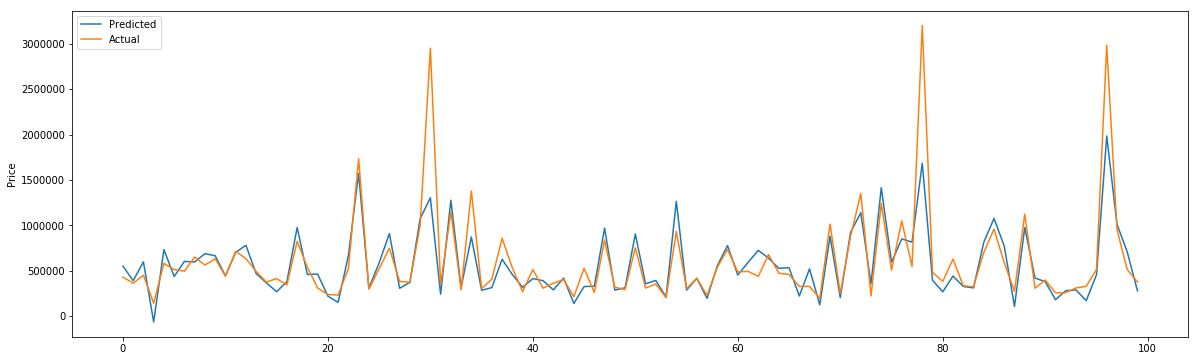

In [38]:
import matplotlib.pyplot as ply
%pylab inline
pylab.rcParams['figure.figsize'] = (20,6)

ply.plot(y_predict, label="Predicted")
ply.plot(y_check, label="Actual")
ply.ylabel('Price')
plt.legend()
plt.show()

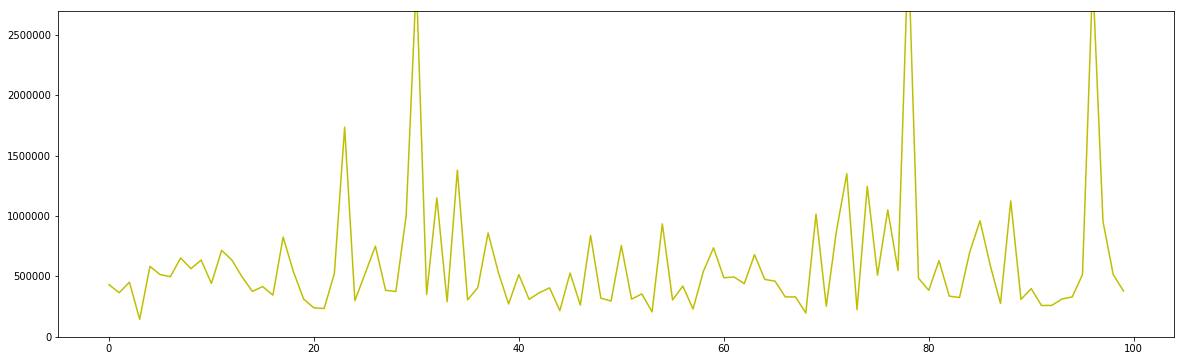

In [39]:
plt.ylim(0, 2700000)
ply.plot(y_check, label="Actual", color='y')

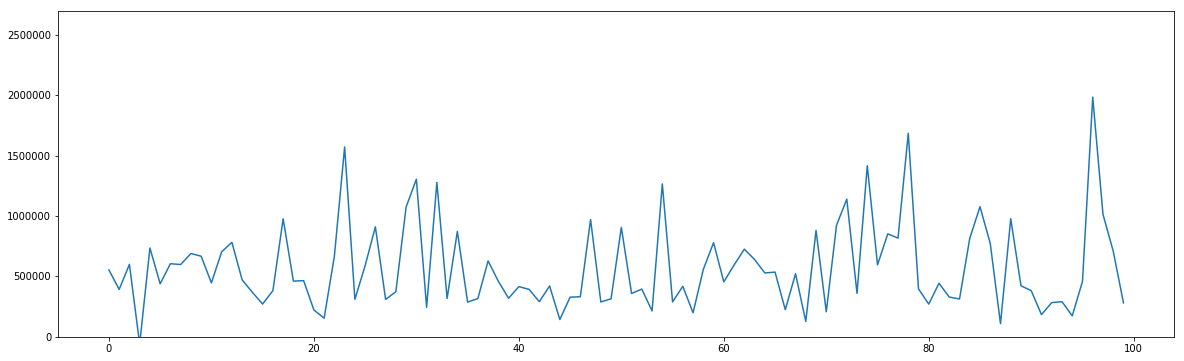

In [40]:
plt.ylim(0, 2700000)
ply.plot(y_predict, label="Predicted")

Finally, I want to see what my house will sell for.<br/> 
my data is zip code, 98166, 2000sq ft, my grade is a 9, and I have 5 bathrooms!

In [41]:
zip_price.loc[98166]

price   -0.321656
Name: 98166, dtype: float64

In [42]:
myHouse = ([[-0.321656,2000,9,5]])

In [43]:
myPrice = lr.predict(myHouse)

In [44]:
myPrice[0 ]

490629.9612030373